**Title**

Predicting the real price of a two-person private room for a Parisian Airbnb rental on a weekday

**Introduction**

Airbnb is an online service that connects hosts with properties for rent to travellers interested in renting short-term homestays. The host of the home is the determinant of the price but will set it according to an array of factors, such as location, view, and cleaning service fee. 

***We are interested in whether factors such as the distance to the city centre and the nearest metro station influence the price of an Airbnb rental in Paris on a weekday***. This will be the question we will try to answer, and using these factors, we will see its influence in the city of our choice, Paris, for a private 2 person room on any given weekday. 

According to Jones (2023), particularly the factors of public transportation and to the city centre play a great deal in convenience when it comes to travel. Paul Swinney, a writer at the Guardian, even stated that proximity to the city centre drives up renting costs, given the higher productivity and economic activity associated with the city (Swinney, 2011). Because of the importance of these factors, with convenience, efficacy, and overall higher enjoyment of the city at the heart of it, we decided to choose these variables to analyze the price of our rental. 

In order to see the relationship between these variables and the Airbnb rental price, we will be analyzing the paris_weekdays.csv dataset from Airbnb Prices in European Cities posted on the Kaggle website (https://www.kaggle.com/datasets/thedevastator/airbnb-prices-in-european-cities?resource=download&select=paris_weekdays.csv) (Gyódi & Nawaro, 2021). The dataset is a .csv file with 3129 observations and twenty vector variables. We will be using four of the variables in our analysis, we'll be using two of them, the capacity of the rental property (person_capacity), and the type of room of the rental (room_type) to filter the dataset and two others, the distance to the city centre (dist) and the distance to a metro station (metro_dist) to predict the price of the rental property (realSum). All the variables are double (dbl) except room_type, which is a character (chr).

**Methods & Results**

*Methods*

In [1]:
#load in packages needed for analysis
set.seed(250)

library(tidyverse)
library(repr)
library(tidymodels)

options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [2]:
#read in Paris dataset from website to jupyter notebook
paris_dataset <- read_csv(
    "https://raw.githubusercontent.com/chadsc79/dsci-100-2022w2-group-7-section-005/main/paris_weekdays.csv")
paris_dataset

New names:
• `` -> `...1`
Rows: 3130 Columns: 20
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): room_type
dbl (16): ...1, realSum, person_capacity, multi, biz, cleanliness_rating, gu...
lgl  (3): room_shared, room_private, host_is_superhost

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,296.1599,Private room,FALSE,TRUE,2,TRUE,0,0,10,97,1,0.6998206,0.1937094,518.4789,25.23938,1218.6622,71.60803,2.35385,48.86282
1,288.2375,Private room,FALSE,TRUE,2,TRUE,0,0,10,97,1,2.1000054,0.1072207,873.2170,42.50791,1000.5433,58.79146,2.32436,48.85902
2,211.3431,Private room,FALSE,TRUE,2,FALSE,0,0,10,94,1,3.3023251,0.2347238,444.5561,21.64084,902.8545,53.05131,2.31714,48.87475
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
3127,567.8535,Entire home/apt,FALSE,FALSE,6,TRUE,0,0,10,96,3,4.312136,0.3046418,178.2228,8.675825,420.7262,24.72168,2.39334,48.88463
3128,200.3915,Entire home/apt,FALSE,FALSE,2,TRUE,0,0,9,93,1,2.891206,0.2406864,235.1685,11.447924,602.4515,35.39977,2.38200,48.87400
3129,301.2862,Entire home/apt,FALSE,FALSE,2,FALSE,0,0,10,92,1,3.469721,0.5084927,200.6395,9.767062,478.9928,28.14540,2.39992,48.85886


**Table 1.** The dataset of Airbnb rentals for Paris on a weekday.

We wrangled our data to only include the columns we will be using for our analysis such as "dist", "metro_dist", "person_capacity", "room_type" and "realSum". Furthermore, we filtered it to only include the data for the "Private room", where capacity is 2, as this is the most prevalent capacity for the room_type we are interested in.

In [3]:
#select variables to predict the data and filter for private room and two-person capacity
paris_clean_dataset <- select(paris_dataset, dist, metro_dist, person_capacity, room_type, realSum)|>
    filter(room_type == "Private room") |>
    filter(person_capacity == 2)
paris_clean_dataset

dist,metro_dist,person_capacity,room_type,realSum
<dbl>,<dbl>,<dbl>,<chr>,<dbl>
0.6998206,0.1937094,2,Private room,296.1599
2.1000054,0.1072207,2,Private room,288.2375
3.3023251,0.2347238,2,Private room,211.3431
⋮,⋮,⋮,⋮,⋮
4.232441,0.09317788,2,Private room,213.6732
4.170402,0.01023344,2,Private room,136.0798
2.687260,0.22577602,2,Private room,151.6917


We found minimum and maximum prices in our data to divide realSum into proper ranges for the classification analysis.

In [4]:
#find the min/max of the training dataset
options(digits = 4)

min_max_prices <- summarize(paris_clean_dataset,
          minimum_price = min(realSum),
          maximum_price = max(realSum))
min_max_prices

minimum_price,maximum_price
<dbl>,<dbl>
117.2,1170


**Table 2.** Paris dataset filtered for private rooms with a two-person capacity using distance to the city centre (dist), distance to a metro station (metro_dist), and price of the Airbnb rental (realSum).

Based on the minimum and maximum prices found, we created a new column "price_range" that will be used for the classification.

In [5]:
#create price ranges to be predicted with the training set
paris_clean_dataset$price_range <- cut(paris_clean_dataset$realSum, breaks = c(0, 200, 500, 1000,2000, 15000))
paris_clean_dataset

dist,metro_dist,person_capacity,room_type,realSum,price_range
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<fct>
0.6998,0.1937,2,Private room,296.2,"(200,500]"
2.1000,0.1072,2,Private room,288.2,"(200,500]"
3.3023,0.2347,2,Private room,211.3,"(200,500]"
⋮,⋮,⋮,⋮,⋮,⋮
4.232,0.09318,2,Private room,213.7,"(200,500]"
4.170,0.01023,2,Private room,136.1,"(0,200]"
2.687,0.22578,2,Private room,151.7,"(0,200]"


**Table 3.** Dataset including the new column, price range (price_range).

In [6]:
#find the training set average of each variable
options(digits = 4)

summarized_paris_dataset <- summarize(paris_clean_dataset,
                                      avg_dist = mean(dist),
                                      avg_metro_dist = mean(metro_dist),
                                      avg_price = mean(realSum))
summarized_paris_dataset

avg_dist,avg_metro_dist,avg_price
<dbl>,<dbl>,<dbl>
3.205,0.2294,274


**Table 4.** Average distance to the city centre (avg_dist), average distance to a metro station (avg_metro_dist), and average price (avg_price) of the Paris weekday dataset.

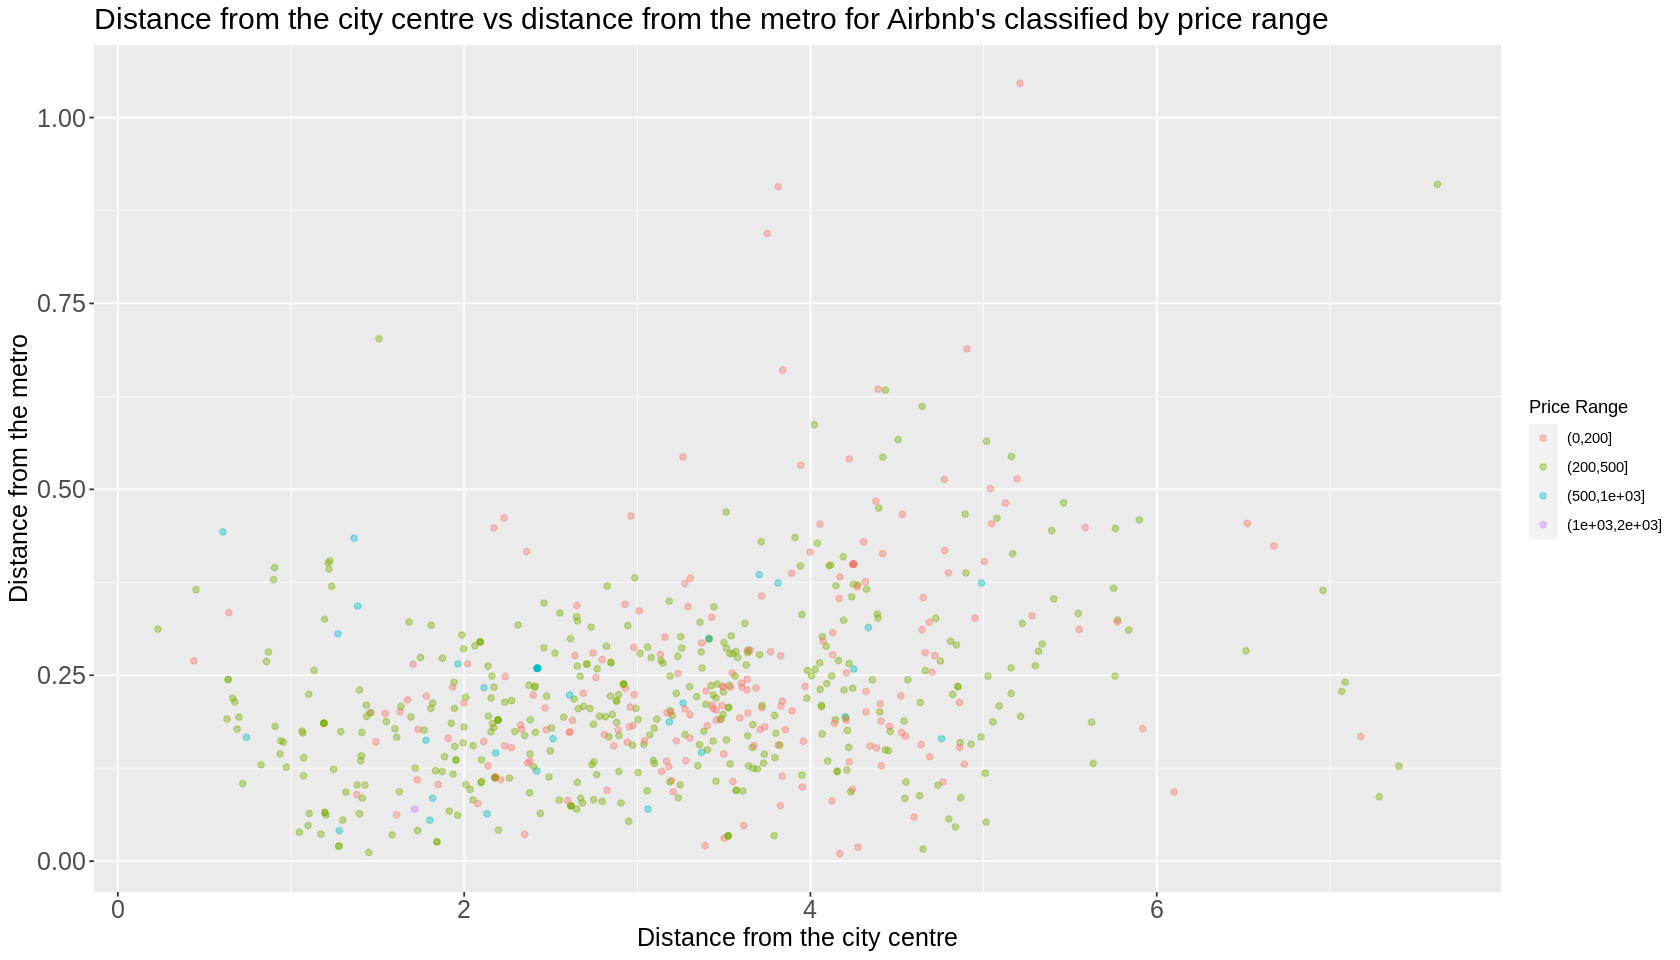

In [14]:
#scatterplot of distance from the city centre and distance from the metro for private room types, categorized by price
options(repr.plot.width = 14, repr.plot.height = 8)

dataset_visual <- paris_clean_dataset|>
    ggplot( aes(x = dist, y = metro_dist, color = price_range))+
    geom_point(alpha = 0.4) +
    labs(x = "Distance from the city centre", y = "Distance from the metro", color = "Price range")+
    ggtitle("Distance from the city centre vs distance from the metro for Airbnb's classified by price range")+
    theme(axis.text = element_text(size = 15),
    axis.title = element_text(size = 15),
    plot.title = element_text(size = 18))
dataset_visual

**Figure 1.** The graph above plots the distance from the city centre on the x-axis against the distance from the metro on the y-axis. We are using the price range as a factor to differentiate the points to see whether the Airbnb available with particular conditions falls in a cheaper price range or not. Here we can see the points in the lower left corner have the most favourable conditions according to a general person since these points have the least distance from transportation and the city centre. However, even though these points have favourable conditions, most belong to the cheaper end of the spectrum. One thing to note though is that our average price is 274,and this falls in the (200,500] price bracket. Even though the points in the left corner may seem to be in the cheaper end of the spectrum, from the graph it can be seen that the majority of the points are green so they're more so near the average.

We have split our data into training and testing set to to evaluate the performance of the model on unseen data. The main purpose of this is to prevent overfitting and ensure that the model generalizes well to new, unseen data.

In [8]:
#split the data into a testing set and a training set

paris_split <- initial_split(paris_clean_dataset, prop = .80, strata = price_range)  

paris_test <- testing(paris_split)

paris_train <- training(paris_split)
paris_train

dist,metro_dist,person_capacity,room_type,realSum,price_range
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<fct>
3.998,0.4158,2,Private room,193.6,"(0,200]"
2.115,0.2333,2,Private room,868.9,"(500,1e+03]"
1.490,0.1606,2,Private room,173.4,"(0,200]"
⋮,⋮,⋮,⋮,⋮,⋮
3.794,0.13921,2,Private room,238.8,"(200,500]"
3.791,0.03430,2,Private room,278.2,"(200,500]"
4.232,0.09318,2,Private room,213.7,"(200,500]"


**Table 5.** The Paris training dataset used to train the K-value.

In [9]:
#pre-process the data
paris_recipe <- recipe(price_range ~ dist + metro_dist, data = paris_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

#tune classifier
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |> 
         set_engine("kknn") |>  
         set_mode("classification")

#create a tibble for the k values
k_vals <- tibble(neighbors = seq(from = 1, to = 40, by = 2))

#make a v-fold
paris_vfold <- vfold_cv(paris_train, v = 10, strata = price_range)

#create a workflow and labels
knn_results <- workflow() |>
  add_recipe(paris_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = paris_vfold, grid = k_vals) |>
  collect_metrics()
knn_results

! Fold01: internal:
  No observations were detected in `truth` for level(s): '(1e+03,2e+03]'...
  Computation will proceed by ignoring those levels.

! Fold02: internal:
  No observations were detected in `truth` for level(s): '(1e+03,2e+03]'...
  Computation will proceed by ignoring those levels.

! Fold03: internal:
  No observations were detected in `truth` for level(s): '(1e+03,2e+03]'...
  Computation will proceed by ignoring those levels.

! Fold04: internal:
  No observations were detected in `truth` for level(s): '(1e+03,2e+03]'...
  Computation will proceed by ignoring those levels.

! Fold05: internal:
  No observations were detected in `truth` for level(s): '(1e+03,2e+03]'...
  Computation will proceed by ignoring those levels.

! Fold06: internal:
  No observations were detected in `truth` for level(s): '(1e+03,2e+03]'...
  Computation will proceed by ignoring those levels.

! Fold07: internal:
  No observations were detected in `truth` for level(s): '(1e+03,2e+03]'...
  Co

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.5508,10,0.01919,Preprocessor1_Model01
1,roc_auc,hand_till,0.5485,10,0.02632,Preprocessor1_Model01
3,accuracy,multiclass,0.5407,10,0.01489,Preprocessor1_Model02
⋮,⋮,⋮,⋮,⋮,⋮,⋮
37,roc_auc,hand_till,0.5680,10,0.03143,Preprocessor1_Model19
39,accuracy,multiclass,0.6144,10,0.01498,Preprocessor1_Model20
39,roc_auc,hand_till,0.5730,10,0.02964,Preprocessor1_Model20


**Table 6.** The results of the workflow using a vfold of 10.

In [10]:
#calculate accuracies
accuracies <- knn_results |>
  filter(.metric == "accuracy") 
accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.5508,10,0.01919,Preprocessor1_Model01
3,accuracy,multiclass,0.5407,10,0.01489,Preprocessor1_Model02
5,accuracy,multiclass,0.5777,10,0.01758,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
35,accuracy,multiclass,0.6260,10,0.01431,Preprocessor1_Model18
37,accuracy,multiclass,0.6260,10,0.01556,Preprocessor1_Model19
39,accuracy,multiclass,0.6144,10,0.01498,Preprocessor1_Model20


**Table 7.** Table of accuracy of K-neighbours using the standard error (std_err).

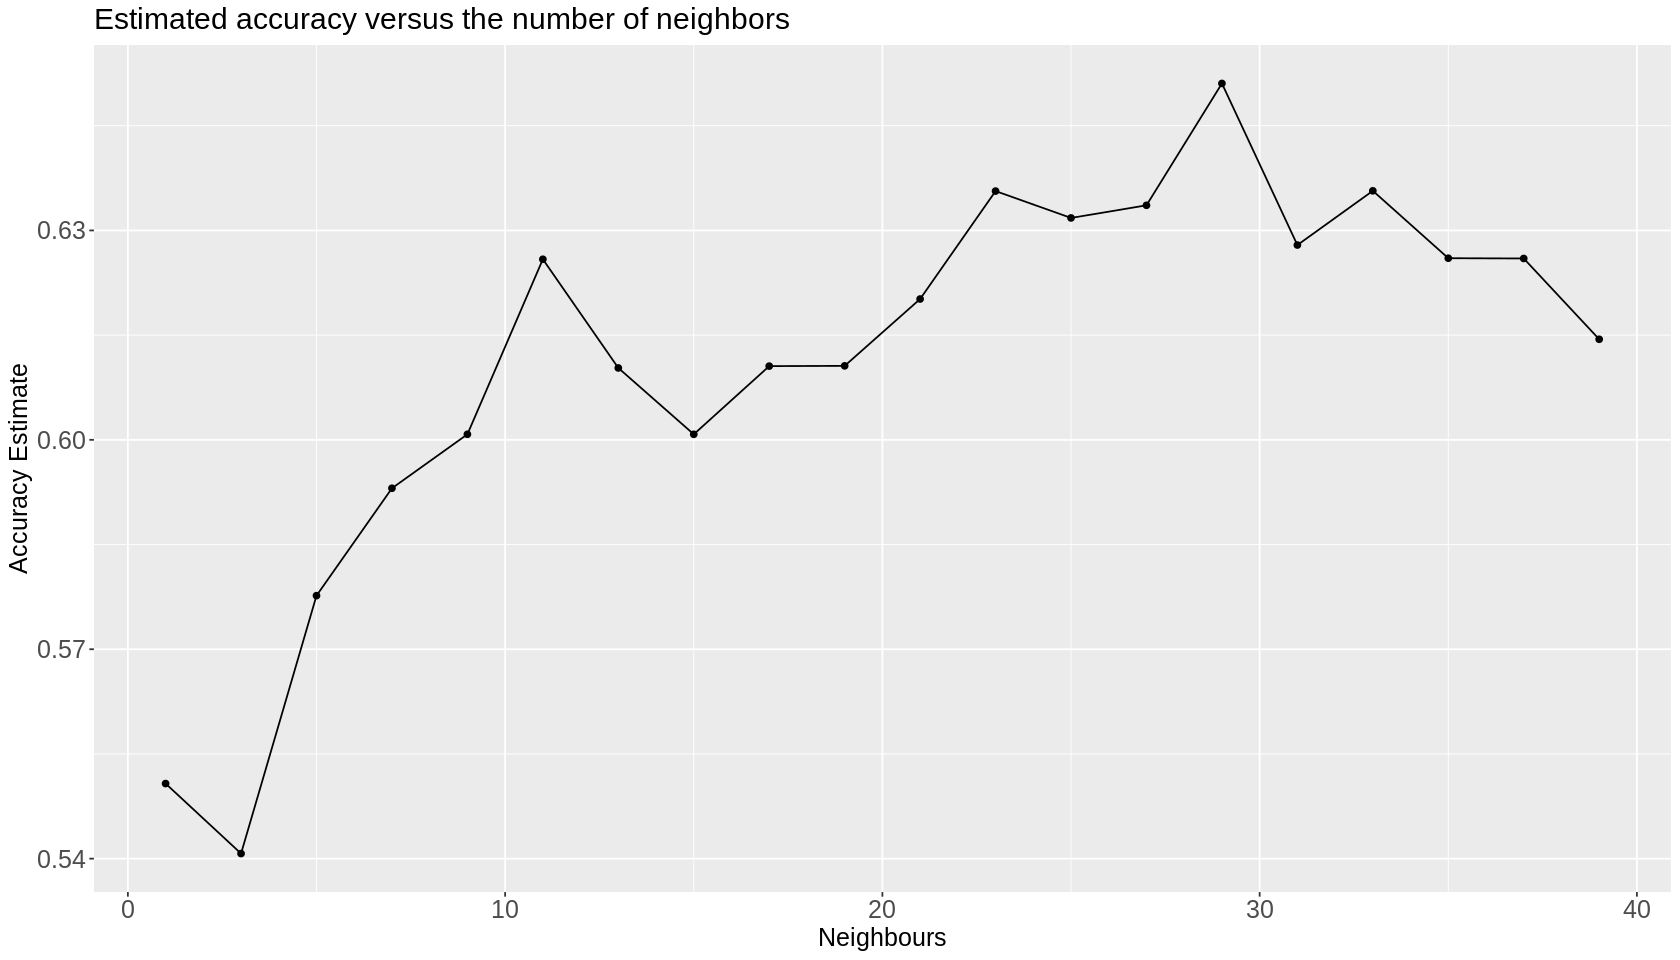

In [11]:
#plot of k values against their respective accuracies
cross_val_plot <- accuracies |> 
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbours", y = "Accuracy Estimate") +
    ggtitle("Estimated accuracy versus the number of neighbors") +
    theme(axis.text = element_text(size = 15),
    axis.title = element_text(size = 15),
    plot.title = element_text(size = 18)) 
cross_val_plot

**Figure 2.** Plot of the estimated accuracy for each K value. 

In [12]:
#tune the classifier with optimal k value
knn_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 25) |>
  set_engine("kknn") |>
  set_mode("classification")

#create a workflow
paris_fit <- workflow() |>
  add_recipe(paris_recipe) |>
  add_model(knn_best_spec) |>
  fit(data = paris_train)

#get the prediction column
paris_predictions <- predict(paris_fit, paris_test) |> 
    bind_cols(paris_test)
paris_predictions

.pred_class,dist,metro_dist,person_capacity,room_type,realSum,price_range
<fct>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<fct>
"(200,500]",0.6998,0.1937,2,Private room,296.2,"(200,500]"
"(200,500]",0.6755,0.2141,2,Private room,242.8,"(200,500]"
"(200,500]",1.0735,0.1394,2,Private room,242.8,"(200,500]"
⋮,⋮,⋮,⋮,⋮,⋮,⋮
"(200,500]",3.675,0.15557,2,Private room,139.3,"(0,200]"
"(0,200]",4.247,0.39935,2,Private room,127.2,"(0,200]"
"(200,500]",4.170,0.01023,2,Private room,136.1,"(0,200]"


**Table 8.** Predictions of the price of the Airbnb rentals in Paris on a weekday using an optimized K value of 25.

In [13]:
#compare the accuracy of predictions to the true values in the test set
paris_acc <- paris_predictions |> 
    metrics(truth = price_range, estimate = .pred_class) |> 
    select(.metric, .estimate) |> 
    head(1)
paris_acc

.metric,.estimate
<chr>,<dbl>
accuracy,0.5659


**Table 9.** The reported accuracy estimate of the K value selected for analysis.

*Results*

Using a v-fold of ten on the Paris weekday training data, the optimal K-value found was 25. There resultant accuracy of the data analysis using a K-value of 25 was found to be 0.5659. Even though this K-value did not have the highest accuracy, it was used since there was not a drastic change in the accuracy of its neighbours (Figure 2). Sometimes the accuracy spiked up because we are using ten folds here, so the same data is getting used again. Hence, using a K-value with relatively stable accuracy amongst the surrounding K-values is better.

**Discussion**

Through our analysis of predicting the actual price of a two-person private room in Paris on a weekday, we found that the distance from the Airbnb rental to the city centre and the distance to the nearest metro station helped predict the actual price. We expected to find that private room rentals with a two-person capacity closer to the city centre and closer to the metro will be more expensive than those farther away. However, the optimized k-value we used in our analysis gave us a low accuracy. We expected to have a higher accuracy so that we could be certain about the determinates predicting the price range of an Airbnb rental. 

This may indicate that other factors beyond distance to the city centre and distance to the metro station affect the price of an Airbnb rental. According to Zhang et al. (2017), other factors that increase the price of an Airbnb rental include: the rental having a positive Airbnb reputation via positive reviews, the rental having many reviews, and the distance from the rental to landmarks (not just city centre and metro stations). Also, host and rental attributes, rental amenities and services, and rules regarding the rental all affect the price. Not including some or all of these factors affects the accuracy of the analysis, thus causing lower accuracy.

Any impacts from this study will help Airbnb hosts determine the private room price that they charge for their rental based on the criteria we used in the study. It will also help renters gauge how much to expect to pay when staying in areas similar to those in the study. This will also help Airbnb focus its advertising on criteria that matters to renters and hosts to create more business, increasing their profits.

Using the factors we did to determine the price of Airbnb rentals and the low accuracy returned may lead Airbnb, Airbnb renters or hosts, or other interested parties to ask questions such as:

Are there better price predictors for an Airbnb rental that were not used, such as cleanliness rating and overall guest satisfaction? Do these findings also occur in other Airbnb cities? Is there a difference in price for Airbnb rentals in urban areas compared to rural areas using the same criteria? Do the same criteria for weekday rental prices also apply to weekend rentals?

**References**

Jones, R. (2022, October 3). How to find the best location for your next Airbnb - AirHost Academy. AirHost Academy - The Airbnb Host Blog for Tips and Secrets. Retrieved April 9, 2023, from https://airhostacademy.com/how-to-find-the-best-location-for-your-next-airbnb/ 

Gyódi, K., & Nawaro, Ł. (2021, April 8). Airbnb Prices in European Cities: Determinants of Price by Room Type, Location, Cleanliness Rating, and More. Retrieved February 20, 2023, from https://www.kaggle.com/datasets/thedevastator/airbnb-prices-in-european-cities?resource=download&amp;select=paris_weekdays.csv. 

Swinney, P. (2011, November 9). Statsblog: What role do city centres play in local economic growth? The Guardian. Retrieved April 9, 2023, from https://www.theguardian.com/local-government-network/statsblog/2011/nov/09/statsblog-role-of-city-centres 

Zhang, Z., Chen, R., Han, L., & Yang, L. (2017). Key Factors Affecting the Price of Airbnb Listings: A Geographically Weighted Approach. Sustainability, 9(9), 1635. https://doi.org/10.3390/su9091635